In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA

In [4]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')

gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
norm_frame = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))

In [5]:
dist_chem = de.aa_distance_matrix(aa)
dist_p53 = de.dms_distance_matrix(norm_frame)

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


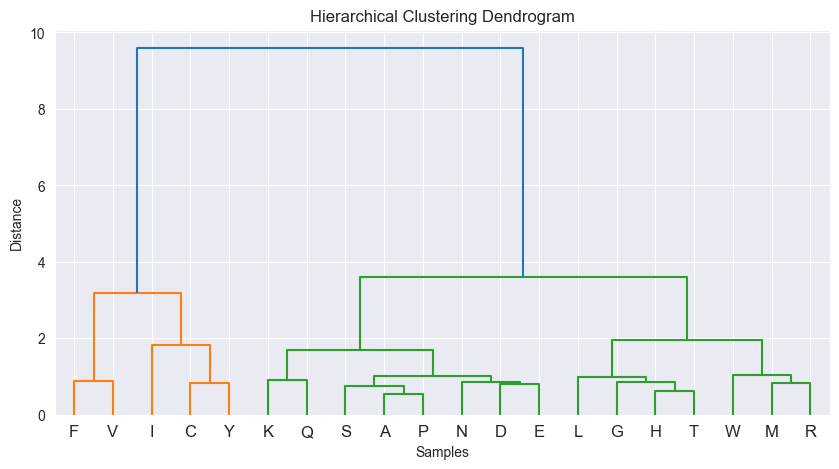

In [6]:
## HIERARCHISCHES CLUSTERN

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hc.fit(dist_p53)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
de.plot_dendrogram(hc, labels=dist_p53.index)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [7]:
best_clusters = de.determine_clusters_silhouette(dist_p53)
print(best_clusters)

2


C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matri

C:\Users\ennow\AppData\Local\Temp\ipykernel_11316\727439665.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dist_p53, method='ward')


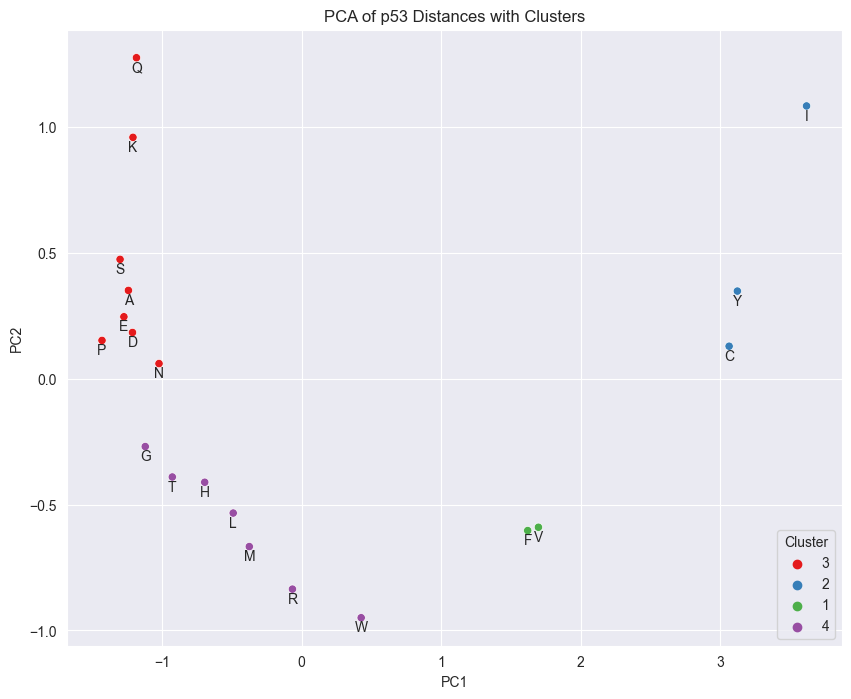

In [8]:
# Perform hierarchical clustering
hc = linkage(dist_p53, method='ward')

# Determine the cluster labels
num_clusters = 4  # Replace manually if automated code is not showing the wanted results
cluster_labels = fcluster(hc, num_clusters, criterion='maxclust')

# Transform the data to the first two principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dist_p53)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels.astype(str)
pca_df['Label'] = dist_p53.index

# Plot the PCA results with cluster information using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')

# Annotate the plot with labels
for i, point in pca_df.iterrows():
    plt.annotate(point['Label'], (point['PC1'], point['PC2']), textcoords="offset points", xytext=(0, -10), ha='center')

# Set plot title and labels
plt.title('PCA of p53 Distances with Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Move the legend to the lower right corner
plt.legend(title='Cluster', bbox_to_anchor=(1, 0), loc='lower right')

# Show the plot
plt.show()
